In [131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df1=pd.read_csv("titanic_train.csv")

In [133]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
#checking shape of data frame
df1.shape

(891, 12)

Here we have 891 rows and 12 columns including the target column "Survived".

# Checking the Value Counts for the Categorical data

In [135]:
df1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [136]:
df1['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [137]:
df1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [138]:
df1["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [139]:
df1["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Checking Missing Values

In [140]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here, we see that Cabin has Null Values more than 50 percent. We also have Null Values for Age and Embarked, however, we can treat them.

In [141]:
#Dropping Unrelated columns

In [142]:
df=df1.drop(["PassengerId","Ticket","Cabin"],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# Filling Missing Values

Here we filling Null values by mean() for numerical values of "Age"and mode() for categorical values of "Embarked".

In [143]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Exploratory Data Analysis

In [145]:
#visualisation how many pasanger survived and how many dead

In [146]:
def bar_chart(column):
    survived=df[df["Survived"]==1][column].value_counts()
    dead=df[df["Survived"]==0][column].value_counts()
    df1=pd.DataFrame([survived,dead])
    df1.index=["Survived","Dead"]
    df1.plot(kind="bar",figsize=(10,5))

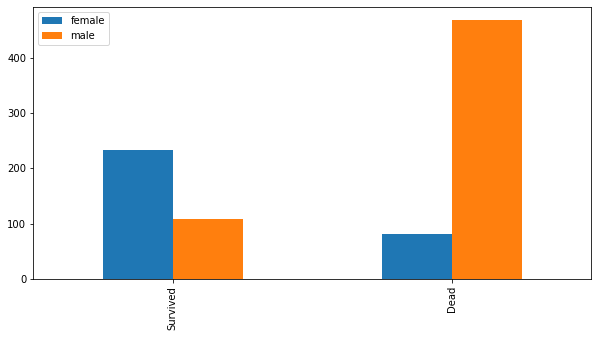

In [147]:
#here we make a bar chart on sex column
#for checking how many male & female
bar_chart("Sex")

In the above chart we can easily analyse that females have more chance to survived.

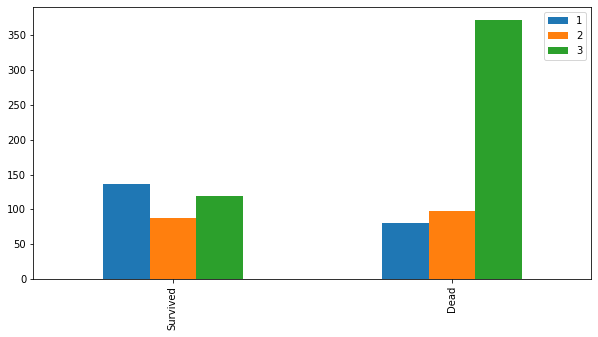

In [148]:
#here we going to make bar char on Pclass
bar_chart("Pclass")

From the above chart on Pclass we can say that 1st class passenger have more chance to survived

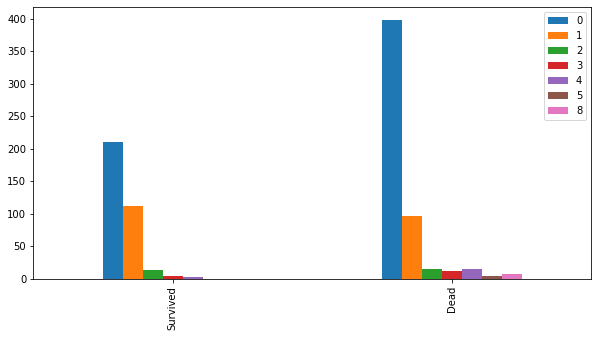

In [149]:
#here we going to make bar chart on sibsp
bar_chart("SibSp")

By above chart we can analyze that there is more chance to survive for those who have 0 or 1 siblings. Here, we also observe that number of dead is high for those who has 0 siblings.

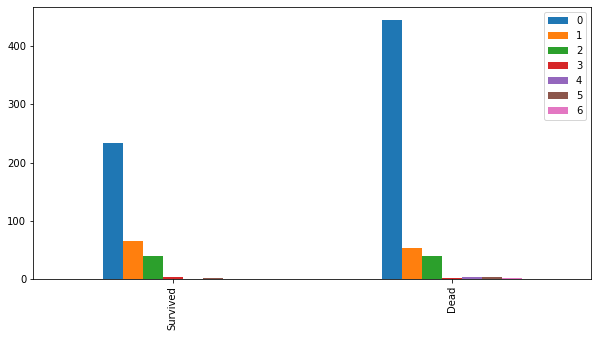

In [150]:
bar_chart("Parch")

By above chart we can analyze that there is more chance to dead for those who has no parent or child. Also, numbers for survived is high with no parent or child.

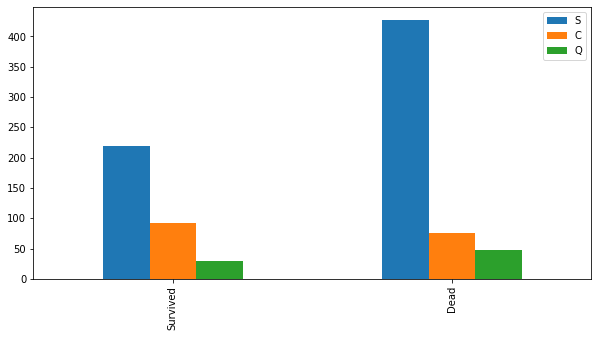

In [151]:
bar_chart("Embarked")

# Detecting outliers and removing them

In [152]:
#visualisation data on boxplot to see the outliers
def box_plot(column):
    df.boxplot(by="Survived",column=[column],grid=True)

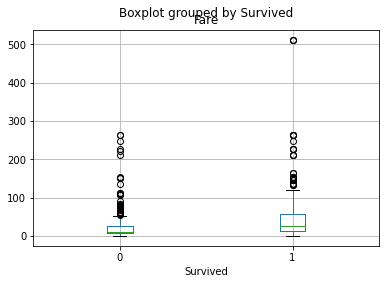

In [153]:
box_plot("Fare")

Here we can see outliers above the 100 we can considerd them as outlier.

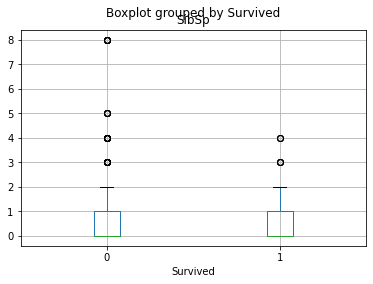

In [154]:
#checking outliers on Sibsp column
box_plot("SibSp")

By above chart we consider more then 5 siblings as outliers.

In [155]:
#here we chacking largest values row on column Sibsp
df.nlargest(12,['SibSp'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,69.55,S
180,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,69.55,S
201,0,3,"Sage, Mr. Frederick",male,29.699118,8,2,69.55,S
324,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,69.55,S
792,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,69.55,S
846,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,69.55,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,69.55,S
59,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,46.90,S
71,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,46.90,S
386,0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,46.90,S


In [156]:
#now we going to remove outliers
df=df.drop([159,180,201,324,792,846,863])
df.shape

(884, 9)

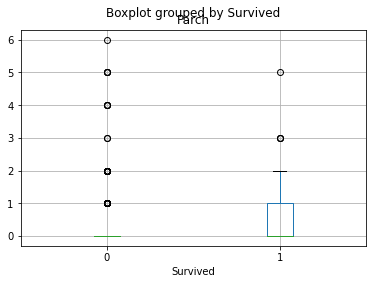

In [157]:
#here we going to check outliers on parch
box_plot("Parch")

In [158]:
df.nlargest(12,["Parch"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,46.9000,S
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,31.2750,S
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,31.3875,S
610,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,31.2750,S
638,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,39.6875,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,27.9000,S
360,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,27.9000,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S
567,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S


In [159]:
df=df.drop([678])
df.shape

(883, 9)

# Correlation

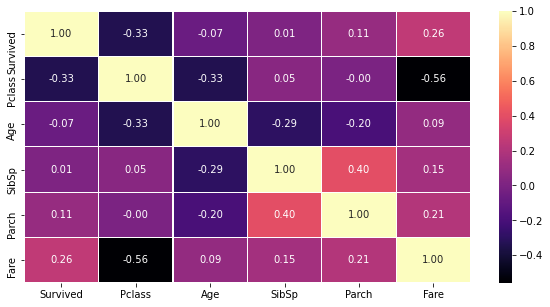

In [160]:
#here we going to drow heatmap to check co relation between columns 

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

Frome EDA we got :

In [161]:
#droping irrelevant columns
#dividing data X(features) and Y(target)
X=df.drop(["Fare","Name","Survived"],axis=True)
y=df["Survived"]

In [162]:
print(X.shape)
print(y.shape)

(883, 6)
(883,)


Normalize Age column because it has high variance.

In [163]:
X["Age"]=np.log(X["Age"])

# Encoding catagorical values

In [164]:
x=pd.get_dummies(X)
x.shape

(883, 9)

# Model Building

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

# Finding Best Random_State

In [166]:
maxAccu=0
BestRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        BestRS=i
        
print("Best Accuracy is :",maxAccu,"on Random_State:",BestRS)

Best Accuracy is : 0.8687782805429864 on Random_State: 5


We have found Best Random_State value as 5. We will create our train_test_split using this random_state(5)

In [167]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=5)

Training LogisticRegression


In [168]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8687782805429864
[[124  15]
 [ 14  68]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       139
           1       0.82      0.83      0.82        82

    accuracy                           0.87       221
   macro avg       0.86      0.86      0.86       221
weighted avg       0.87      0.87      0.87       221



Training DecisionTreeClassifier



In [169]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

pred=dtc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8009049773755657
[[114  25]
 [ 19  63]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       139
           1       0.72      0.77      0.74        82

    accuracy                           0.80       221
   macro avg       0.79      0.79      0.79       221
weighted avg       0.80      0.80      0.80       221



Traning RandomForestClassifier



In [170]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

pred=rfc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8099547511312217
[[114  25]
 [ 17  65]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       139
           1       0.72      0.79      0.76        82

    accuracy                           0.81       221
   macro avg       0.80      0.81      0.80       221
weighted avg       0.82      0.81      0.81       221



We are getting highest accuracy with LogisticRegression but it can be due to overfitting also. So we need to check validation scores.

# Cross Validation

In [171]:
from sklearn.model_selection import cross_val_score

In [172]:
lr=cross_val_score(LogisticRegression(),x,y,cv=5)
print("Cross validating score of Logistic Regression model:",lr.mean())

Cross validating score of Logistic Regression model: 0.8006997945557268


In [173]:
scr=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("Cross validating score of DecisionTreeClassifier model:",scr.mean())

Cross validating score of DecisionTreeClassifier model: 0.7916602465331279


In [174]:
scr=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print("Cross validating score of RandomForestClassifier model:",scr.mean())

Cross validating score of RandomForestClassifier model: 0.7939008731381613


The difference between Model Accuracy Score and Cross Validation Score is minimum for RandomForestClassifier model. Hence, it is the best model.

# Hyperparameter Tuning

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
parameters={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy']}

In [177]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [178]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [179]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [182]:
Final_Mod=RandomForestClassifier(criterion='entropy',max_depth=5)
Final_Mod.fit(x_train,y_train)
pred=Final_Mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.33031674208145


# Saving the model

In [183]:
import joblib
joblib.dump(Final_Mod,"Titanic_Model.pkl")

['Titanic_Model.pkl']